<p style="background-color:#FF9800;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>EDA Project - Smartphones Prices</b></p>

<div style="text-align: center;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfk99c2JGn6MJD5Jug1Zx84W2sbGUbwmdBBA&s" width="200" height="200"/><img src="https://cdn-icons-png.flaticon.com/512/1279/1279648.png" width="200" height="200"/>
</div>

# <font color='#F57C00'> <b>Introduction</b><font color='black'> 

In this project, the aim was to analyze and visualize a dataset containing various attributes of smartphones, including brand, model, RAM, storage, color, contract status (free), and price. The first step involved a thorough examination of the dataset to understand the distribution, range, and types of data within each column. Data cleaning and preprocessing were essential to prepare the dataset for analysis, which included handling missing (NaN) values and making necessary adjustments to the columns. Appropriate methods were employed to impute missing data, ensuring that the dataset was as complete and accurate as possible for analysis.

Following the data cleaning and preparation process, multiple visualizations were created to explore the relationships and patterns within the data. Visualizations included analyses of price distribution across brands, RAM and storage capacity, as well as the color distribution and contract status of the devices. These visualizations aimed to uncover insights about how different features relate to each other, especially in terms of pricing, helping to identify trends and segments within the smartphone market.

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='import-library'></a>
# <font color='#F57C00'> <b>Importing Libraries</b><font color='black'> 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='#F57C00'> <b>Loading The Dataset</b><font color='black'> 

In [13]:
df0 = pd.read_csv("smartphones.csv", index_col= 'Smartphone')
df = df0.copy()

In [15]:
df.head()

,Brand,Model,RAM,Storage,Color,Free,Final Price
Smartphone,,,,,,,
Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [17]:
df.sample(5)

,Brand,Model,RAM,Storage,Color,Free,Final Price
Smartphone,,,,,,,
Samsung Galaxy A33 5G 6/128GB Naranja Libre,Samsung,Galaxy A33,6.0,128.0,Orange,Yes,359.00
Samsung Galaxy A13 A137 4/64GB Azul Libre Versión Importada EU,Samsung,Galaxy A13,4.0,64.0,Blue,Yes,231.99
Apple iPhone 13 Pro 256GB Plata Libre,Apple,iPhone 13,NaN,256.0,Silver,Yes,1279.00
Blackview BV6600 Pro 4/64GB Negro Libre,Blackview,BV6600,4.0,64.0,Black,Yes,389.08
Apple iPhone 12 Mini 64GB Púrpura Libre,Apple,iPhone 12,NaN,64.0,Purple,Yes,689.00


<a id='understanding-dataset'></a>
# <font color='#F57C00'> <b>Understanding The Dataset</b><font color='black'> 

* **Smartphone Name:** The unique identifier or model name of the smartphone.
* **Brand:** Smartphone brand.
* **Model:** Smartphone brand model.
* **RAM (Random Access Memory):** The amount of memory available for multitasking.
* **Storage:** Capacity of the smartphone.
* **Color:** Color of the smarthpone.
* **Free:** Yes/No if the smartphone is attached to a cell company contract.
* **Price:** The cost of the smartphone in the respective currency.

In [19]:
df.shape

(1816, 7)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1816 entries, Realme C55 8/256GB Sunshower Libre to Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1816 non-null   object 
 1   Model        1816 non-null   object 
 2   RAM          1333 non-null   float64
 3   Storage      1791 non-null   float64
 4   Color        1816 non-null   object 
 5   Free         1816 non-null   object 
 6   Final Price  1816 non-null   float64
dtypes: float64(3), object(4)
memory usage: 113.5+ KB


In [23]:
df.duplicated().sum()

16

In [ ]:
# checking duplicated rows
df[df.duplicated(keep=False)]

In [25]:
df = df.drop_duplicates(keep='first') # drop duplicated rows

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM,1318.0,5.946889,2.666517,1.00,4.0000,6.00,8.0000,12.00
Storage,1775.0,162.694085,139.875397,2.00,64.0000,128.00,256.0000,1000.00
Final Price,1800.0,491.401250,398.601282,60.46,200.5325,349.99,654.1325,2271.28


In [29]:
df.describe(include= "object").T

,count,unique,top,freq
Brand,1800,37,Samsung,450
Model,1800,383,iPhone 13,60
Color,1800,17,Black,532
Free,1800,2,Yes,1756


In [30]:
df.nunique()

Brand            37
Model           383
RAM               7
Storage          12
Color            17
Free              2
Final Price    1022
dtype: int64

In [31]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1800   │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA    ┃ NA %    ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50  ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ RAM             │   482 │   26.78 │   5.947 │   2.667 │       1 │       4 │    6 │      8 │    12 │ ▁▇▅▆ ▂ │  │
│ │ Storage         │    25 │    1.39 │   162.7 │   139.9 │       2 │      64 │  128 │    256 │  1000 │  ▇▃ ▁  │  │
│ │ Final Price     │     0 │       0 │   491.4 │   398.6 │   60.46 │   200.5 │  350 │  654.1 │  2271 │  ▇▃▁▁  │  │
│ └─────────────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Brand                     │       0 │          0 │                            1 │                     1800 │  │
│ │ Model                     │       0 │          0 │                          1.8 │                     3288 │  │
│ │ Color                     │       0 │          0 │                            1 │                     1800 │  │
│ │ Free                      │       0 │          0 │                            1 │                     1800 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [32]:
df.isnull().sum()

Brand            0
Model            0
RAM            482
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

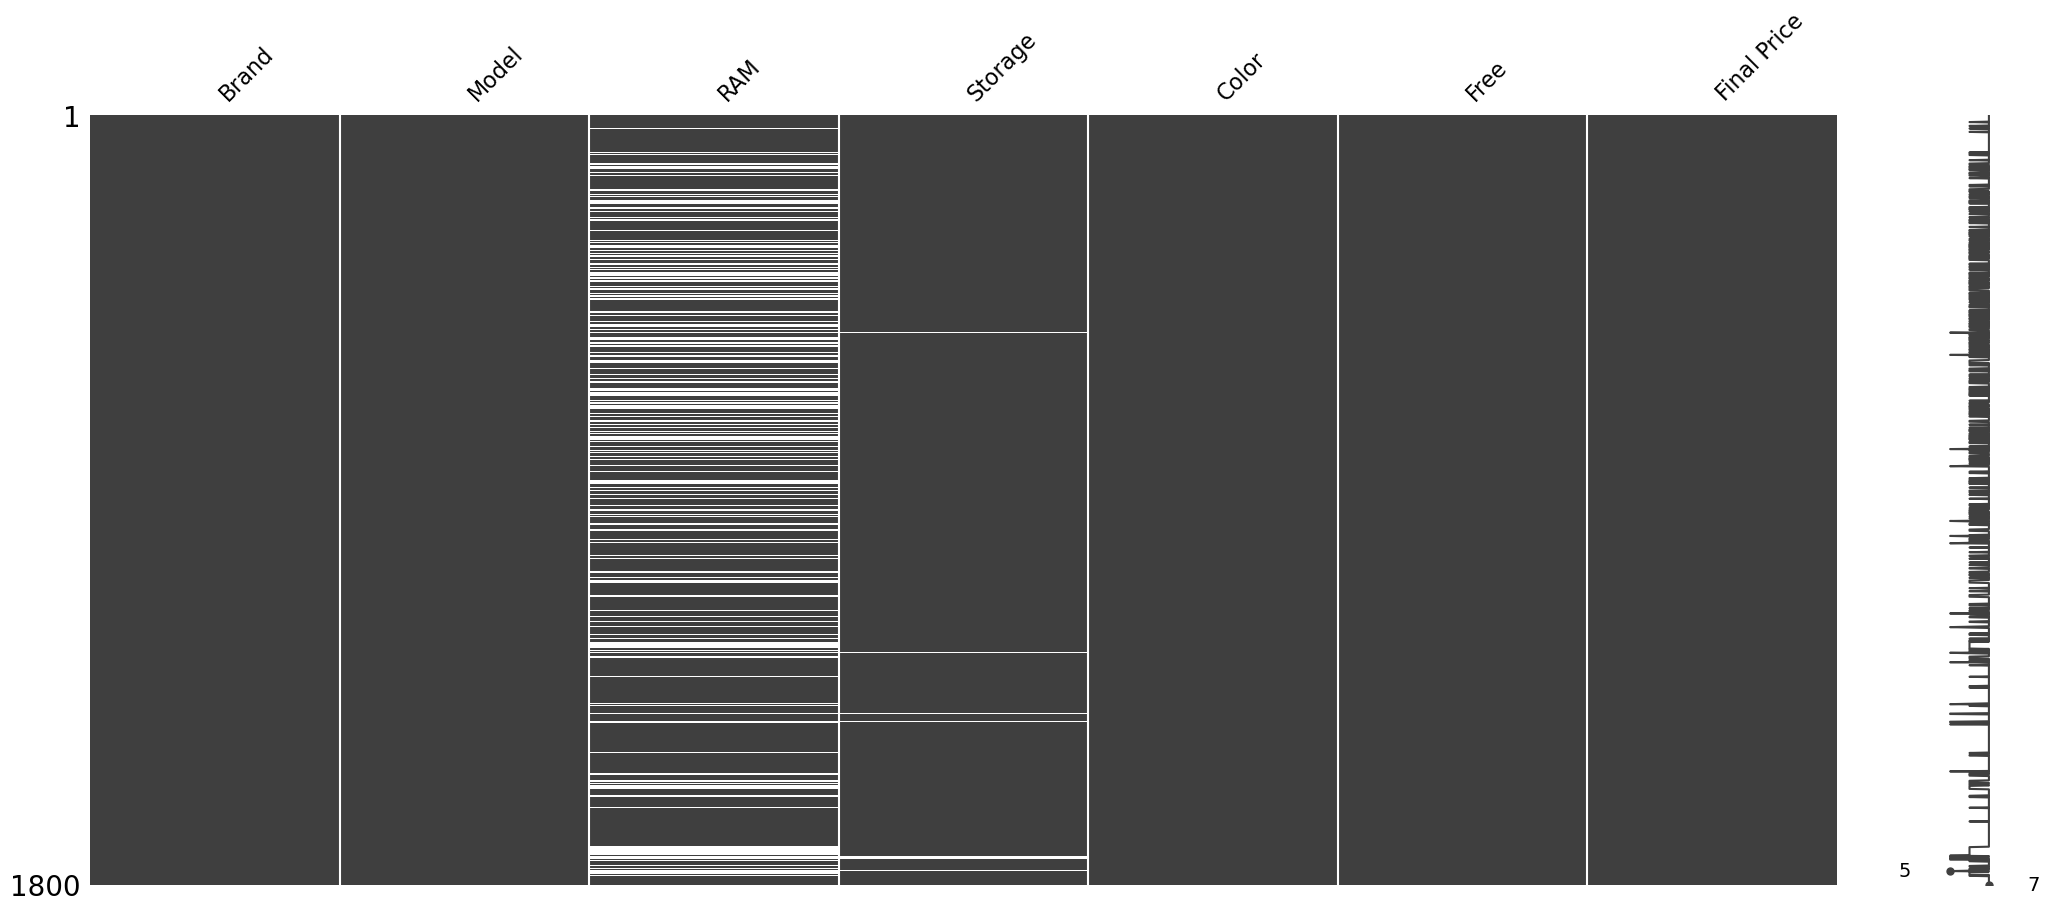

In [33]:
msno.matrix(df);

<a id='organizing-columns'></a>
# <font color='#F57C00'> <b>Organizing Columns</b><font color='black'> 

In [35]:
df.columns

Index(['Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free', 'Final Price'], dtype='object')

In [36]:
df.columns = df.columns.str.lower()
df.columns = ['brand', 'model', 'ram', 'storage', 'color', 'free', 'price']
df.columns

Index(['brand', 'model', 'ram', 'storage', 'color', 'free', 'price'], dtype='object')

## <font color='#FF9800'> <b>"brand" Column</b><font color='black'> 

In [38]:
df.brand.nunique()

37

In [39]:
df.brand.unique()

array(['Realme', 'Samsung', 'Motorola', 'Xiaomi', 'Nothing', 'POCO',
       'Apple', 'OPPO', 'Alcatel', 'Vivo', 'ZTE', 'OnePlus', 'TCL', 'CAT',
       'SPC', 'Cubot', 'Google', 'Ulefone', 'Nokia', 'Honor', 'Huawei',
       'Sony', 'Hammer', 'Qubo', 'Blackview', 'Asus', 'Microsoft', 'BQ',
       'Crosscall', 'Doro', 'Fairphone', 'Funker', 'Gigaset', 'LG',
       'Maxcom', 'Swissvoice', 'Lenovo'], dtype=object)

In [40]:
df.brand = df.brand.str.strip()

"brand" column seems OK for now.

## <font color='#FF9800'> <b>"model" Column</b><font color='black'> 

In [43]:
df.model.nunique()

383

In [44]:
df.model.dtype

dtype('O')

"model" column seems OK for now.

## <font color='#FF9800'> <b>"ram" Column</b><font color='black'> 

In [47]:
df.ram.nunique()

7

In [48]:
df.ram.unique()

array([ 8.,  4.,  6., 12., nan,  3.,  2.,  1.])

After filling the NaN values, we'll change the dtype of the ram column from float to integer.

## <font color='#FF9800'> <b>"storage" Column</b><font color='black'> 

In [51]:
df.storage.nunique()

12

In [52]:
df.storage.unique()

array([ 256.,  128.,  512.,   64.,   32.,   16.,    2.,   nan, 1000.,
          4.,   12.,    3.,    8.])

After filling the NaN values, we'll change the dtype of the storage column from float to integer.

## <font color='#FF9800'> <b>"color" Column</b><font color='black'> 

In [55]:
df.color.nunique()

17

In [56]:
df.color.unique()

array(['Yellow', 'Blue', 'Gray', 'White', 'Black', 'Green', 'Silver',
       'Gold', 'Brown', 'Orange', 'Purple', 'Pink', 'Red', 'Turquoise',
       'Rainbow', 'Bronze', 'Crystal'], dtype=object)

"color" column seems OK for now.

## <font color='#FF9800'> <b>"free" Column</b><font color='black'> 

In [59]:
df.free.nunique()

2

In [60]:
df.free.unique()

array(['Yes', 'No'], dtype=object)

In [61]:
# Changing 'Yes' -> True and 'No' -> False
df['free'] = df['free'].map({'Yes': True, 'No': False})

In [62]:
df.free.dtype

dtype('bool')

## <font color='#FF9800'> <b>"price" Column</b><font color='black'> 

In [64]:
df.price.nunique()

1022

In [65]:
df.price.dtype

dtype('float64')

"price" column seems OK for now.

<a id='nan-values'></a>
# <font color='#F57C00'> <b>NaN Values</b><font color='black'> 

In [68]:
df.isnull().sum()

brand        0
model        0
ram        482
storage     25
color        0
free         0
price        0
dtype: int64

## <font color='#FF9800'> <b>NaN Values In "ram" Column</b><font color='black'> 

In [70]:
df.ram.isnull().sum()

482

In [71]:
df['ram'] = df.groupby('brand')['ram'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

In [72]:
df.ram.isnull().sum() # there are still NaN values in ram column

295

In [73]:
df[df['ram'].isna()].model.unique()

array(['iPhone 14', 'iPhone 12', 'iPhone 11', 'iPhone 13', 'iPhone XR',
       'iPhone 8', 'iPhone XS', 'iPhone SE', '11 Pro', 'iPhone X',
       'iPhone 7', 'Xperia XZ2', 'Aquaris C', '3+', 'Xperia L1',
       'iPhone 6s'], dtype=object)

I asked ChatGPT how much RAM phones with this model usually have and filled in the values given to me.

In [75]:
# Phone models and the ram values of these models
ram_values = {
    'iPhone 14': 6,
    'iPhone 12': 4,
    'iPhone 11': 4,
    'iPhone 13': 4,
    'iPhone XR': 3,
    'iPhone 8': 2,
    'iPhone XS': 4,
    'iPhone SE': 3,
    '11 Pro': 4,
    'iPhone X': 3,
    'iPhone 7': 2,
    'Xperia XZ2': 4,
    'Aquaris C': 2,
    '3+': 4,
    'Xperia L1': 2,
    'iPhone 6s': 2
}

# Filling NaN values according to phone model
df['ram'] = df.apply(lambda row: ram_values.get(row['model'], row['ram']) if pd.isna(row['ram']) else row['ram'], axis=1)

In [76]:
df.ram.isnull().sum()

0

## <font color='#FF9800'> <b>NaN Values In "storage" Column</b><font color='black'> 

In [78]:
df.storage.isnull().sum()

25

In [79]:
# Filling NaN values with median value based on brand and model
df['storage'] = df.groupby(['brand', 'model'])['storage'].transform(
    lambda x: x.fillna(x.median()) if x.median() == x.median() else x.fillna(df['storage'].median())
)

In [80]:
df.storage.isnull().sum()

0

In [81]:
# After filling the NaN values
df.isnull().sum()

brand      0
model      0
ram        0
storage    0
color      0
free       0
price      0
dtype: int64

In [170]:
# Changing dtypes of ram and storage columns from float to integer
df.ram = df.ram.astype('int')
df.storage = df.storage.astype('int')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, Realme C55 8/256GB Sunshower Libre to Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   brand    1800 non-null   object 
 1   model    1800 non-null   object 
 2   ram      1800 non-null   int32  
 3   storage  1800 non-null   int32  
 4   color    1800 non-null   object 
 5   free     1800 non-null   bool   
 6   price    1800 non-null   float64
dtypes: bool(1), float64(1), int32(2), object(3)
memory usage: 150.7+ KB


<a id='data-visualization'></a>
# <font color='#F57C00'> <b>Data Visualization</b><font color='black'> 

In [83]:
# defining color palette that fits the notebook
colors = ['#E65100', '#F57C00', '#FF9800', '#FFC107', '#FF5722', 
           '#FFA726', '#FF7043', '#FFB74D', '#FFD54F', '#FFE082']

## <font color='#FF9800'> <b>Pairplot by 'ram'</b><font color='black'> 

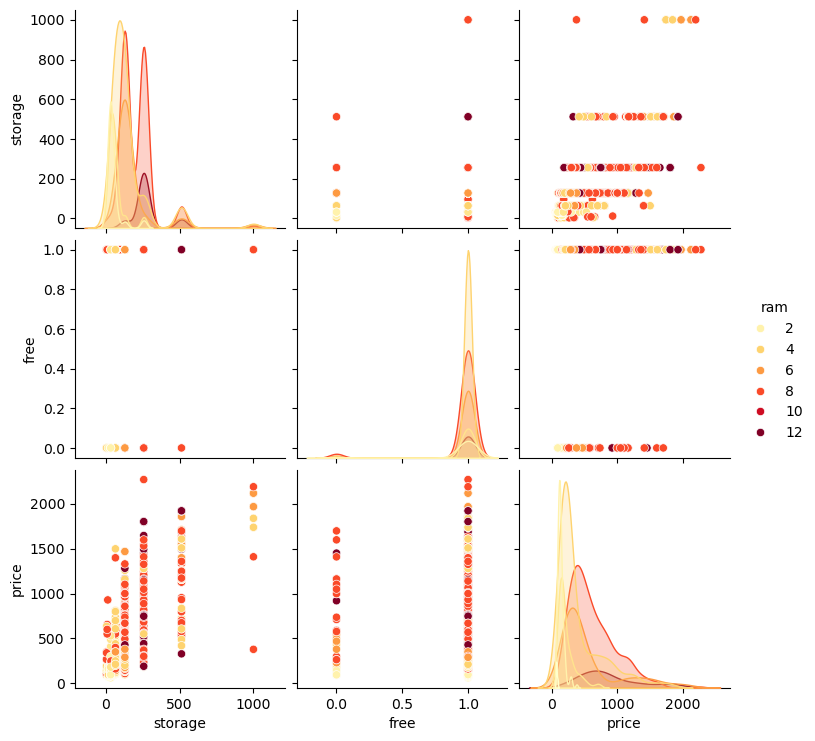

In [85]:
sns.pairplot(df, hue= "ram", palette= "YlOrRd");

This pairplot visualizes the relationships between several smartphone attributes—namely storage, free, and price—while using RAM as a hue to differentiate between levels.

- **Diagonal Plots:** These are KDE (Kernel Density Estimate) plots showing the distribution of each variable for different RAM levels. For instance, the distribution of price across different RAM sizes shows that lower RAM models tend to have lower prices, while models with higher RAM (especially 8GB and above) appear to have a broader price range, with some models reaching higher prices.
- **Storage vs. Price:** We see that models with higher RAM (darker hues) generally align with higher storage capacities and prices. This correlation suggests that higher-end models tend to have both higher RAM and storage.
- **Free vs. Price and Free vs. Storage:** The "free" feature indicates whether the smartphone is associated with a cell company contract. From the plot, there is no clear trend between "free" and the other variables (RAM, storage, and price), as points are scattered across the plot without a distinct pattern. This suggests that whether a phone is tied to a contract does not strongly influence its RAM, storage, or price.
- **Overall:** The pairplot effectively highlights that RAM is associated with both storage and price, as models with higher RAM are typically positioned within higher storage and price ranges. This confirms that devices with higher RAM usually belong to higher-end categories with more premium features, regardless of whether they are attached to a contract.

## <font color='#FF9800'> <b>Relationship Between RAM and Price</b><font color='black'> 

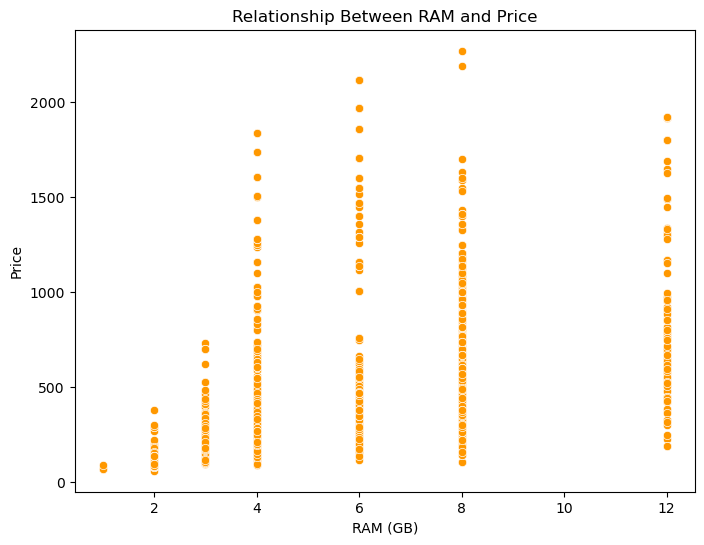

In [88]:
# Scatter plot for ram vs price
plt.figure(figsize=(8,6))
sns.scatterplot(x='ram', y='price', data=df, color= "#FF9800")

plt.title('Relationship Between RAM and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')

plt.show()

In this scatter plot, we observe the relationship between RAM size (in GB) and the price of smartphones. Each point represents a smartphone model. There’s a general trend where price increases as RAM size increases, although there is variability within each RAM category. This pattern indicates that while RAM can impact price, other factors also influence it.

## <font color='#FF9800'> <b>Average Prices By Brand</b><font color='black'> 

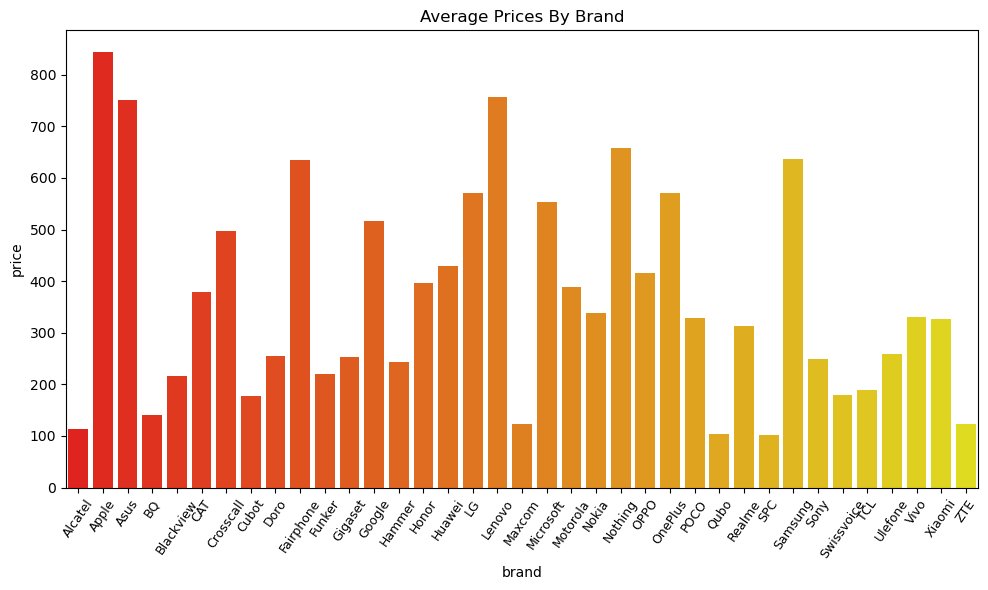

In [91]:
# Grouping average prices by brand
avg_price_by_brand = df.groupby('brand')['price'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='brand', y='price', data=avg_price_by_brand, palette="autumn")

plt.title('Average Prices By Brand')
plt.xticks(rotation=55, size= 9)
plt.tight_layout()

plt.show()

This bar chart shows the average price of smartphones by brand. Some brands, like Apple and Samsung, have higher average prices, indicating a premium market position. On the other hand, brands such as Xiaomi and Huawei have lower average prices, likely targeting budget-conscious consumers. The wide price range across brands suggests significant variation in market positioning.

## <font color='#FF9800'> <b>Relationship Between Storage and Price</b><font color='black'> 

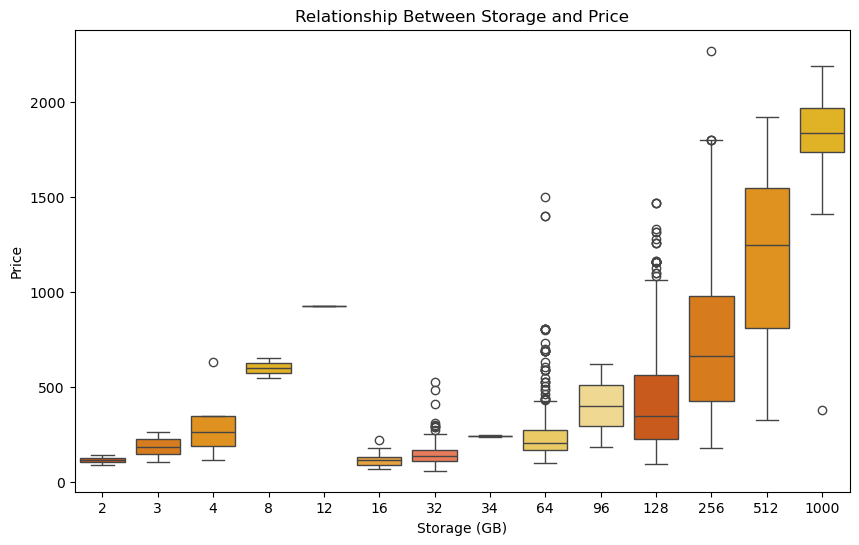

In [172]:
# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='storage', y='price', data=df, palette= colors)

plt.title('Relationship Between Storage and Price')
plt.xlabel('Storage (GB)')
plt.ylabel('Price')

plt.show()

In this box plot, we examine the relationship between storage capacity (in GB) and smartphone price. There’s a clear trend of increasing price with higher storage capacities. The variability in prices also widens at higher storage levels, suggesting that high-storage models are available across a wider price range, possibly due to differences in additional features or brand premiums.

## <font color='#FF9800'> <b>The Most Used 10 Colors in Smartphones</b><font color='black'> 

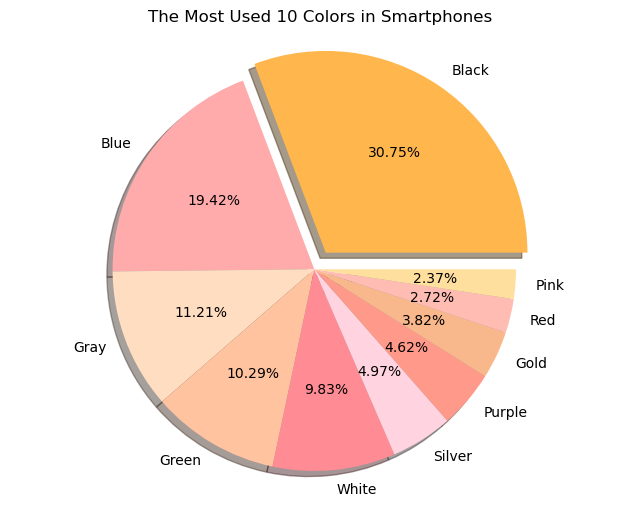

In [97]:
top10_color = df['color'].value_counts()[:10]

plt.figure(figsize=(8,6))
plt.pie(top10_color,
        labels=top10_color.index,
        autopct='%1.2f%%',
        explode= [0.1,0, 0, 0, 0, 0, 0, 0, 0, 0],
        shadow= True,
        colors= ['#FFB74D', '#FFABAB', '#FFDDC1', '#FFC3A0', '#FF8C94',
                            '#FFD4E0', '#FF9A8B', '#F8B88B', '#FFBCB3', '#FFDF9D']
       )

plt.title('The Most Used 10 Colors in Smartphones')
plt.axis('equal')

plt.show()

This pie chart shows the distribution of the top 10 colors used in smartphones. Black, Blue, and White are the most common colors, which reflects popular consumer preferences. The dominance of these colors may be due to their versatility and appeal to a broad audience.

## <font color='#FF9800'> <b>RAM Distribution of Top 10 Brands</b><font color='black'> 

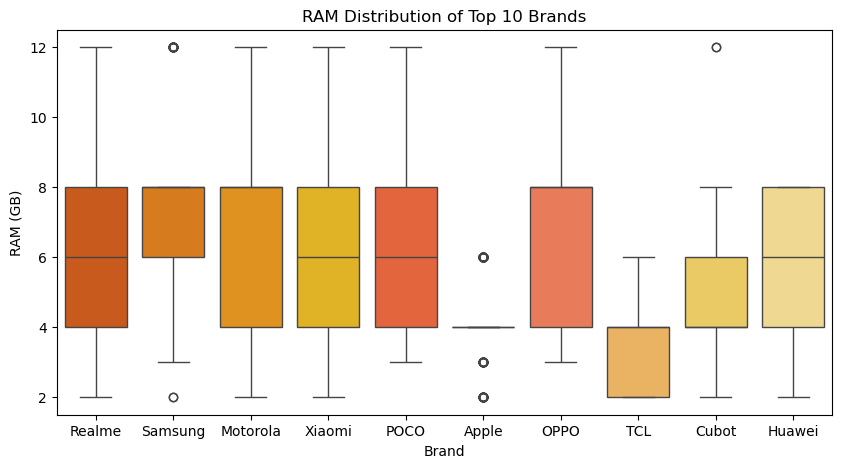

In [100]:
# Choosing top 10 brands
top_10_brands = df['brand'].value_counts().head(10).index
df_top_10 = df[df['brand'].isin(top_10_brands)]

# Bar plot
plt.figure(figsize=(10,5))
sns.boxplot(x='brand', y='ram', data=df_top_10, palette= colors)

plt.title('RAM Distribution of Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('RAM (GB)')

plt.show()

This box plot compares the RAM distribution for the top 10 smartphone brands. The plot highlights that brands differ in the range and median RAM sizes they offer. For example, some brands have a broader RAM range, catering to both low-end and high-end models, while others focus on specific RAM sizes, likely targeting a particular market segment.

## <font color='#FF9800'> <b>Relationship Between Futures (Columns)</b><font color='black'> 

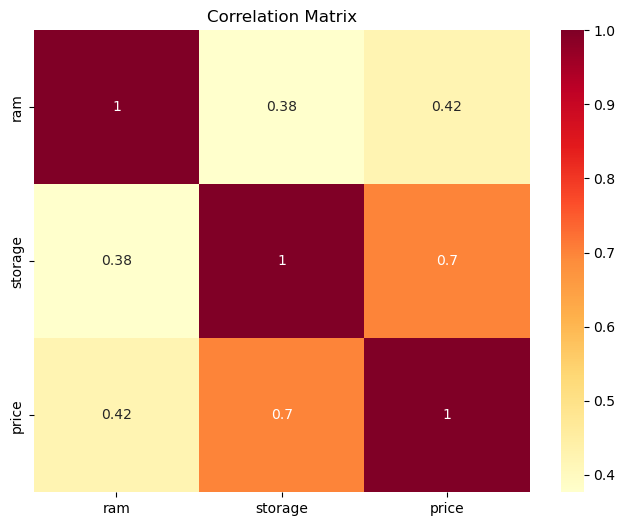

In [103]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['ram', 'storage', 'price']].corr(), annot=True, cmap='YlOrRd')

plt.title('Correlation Matrix')

plt.show()

This heatmap represents the correlation matrix among different smartphone features, such as RAM, storage, and price. High positive correlations are shown in darker colors. There is a moderate positive correlation between RAM, storage, and price, indicating that as the specifications (RAM and storage) increase, the price tends to increase as well. This matrix helps identify features that tend to influence each other.

<a id='conclusion'></a>
# <font color='#F57C00'> <b>Conclusion</b><font color='black'> 

This project provided valuable insights into the smartphone market by leveraging data analysis and visualization techniques. The analyses revealed significant relationships between attributes such as RAM, storage, and price. Higher RAM and storage capacities were generally associated with higher price points, suggesting that these features are often found in premium smartphone models. Additionally, brand-based pricing analysis demonstrated considerable variation across brands, which may reflect differences in market positioning, target demographics, and brand value.

The contract status (free) analysis indicated that whether a phone is linked to a cell carrier contract does not significantly impact its price, RAM, or storage, which suggests that carrier contracts are independent of device specifications. Moreover, the distribution of color choices revealed the most popular color options in smartphones, contributing to an understanding of consumer preferences.

Overall, this project highlighted key insights and trends in smartphone features and pricing. The visualizations enabled a clear and intuitive understanding of the data, assisting stakeholders in making informed decisions about market trends and product positioning.

<p style="background-color:#FF9800;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>